# Predicting Heart Disease using learning
1. Problem Definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation
   ## 1.Problem Definition


In [1]:
import numpy as np
import pandas as pd

In [2]:
#Load the data
hea=pd.read_csv('heart-disease.csv')

In [3]:
hea.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
hea.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
hea.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## Preparing the tools 

we're going to use pandas and numpy 

In [6]:
#Import the tools we need

#regular EDA librariers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#Models from sklearn 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Model Evaluation
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import RocCurveDisplay

In [7]:
hea.shape #(rows,col)

(303, 14)

## Data Exploration EDA

The goal is to find out more about data and become a subject matter export on the dataset you're working with1
1. What Questions are you trying to solve
2. What kind of data you have and how do you treat diff types?
3. Whats missing from the data and how to deal eith them
4. Where are the outliers and why should you care about them?
5. How can you add change or remove features to get more out of your data?


In [8]:
hea['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

<Axes: xlabel='target'>

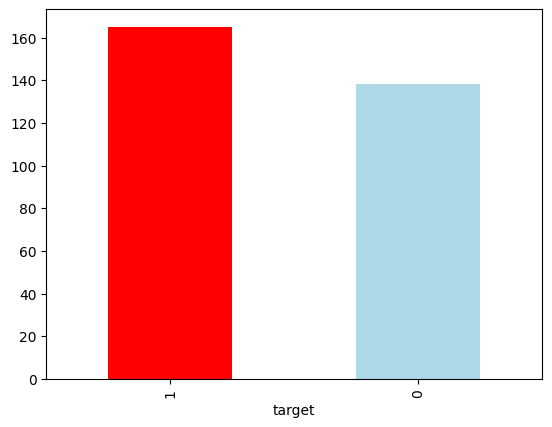

In [9]:
hea['target'].value_counts().plot(kind='bar',color=['red','lightblue'])

In [10]:
hea.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequency according to Sex

In [11]:
hea.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

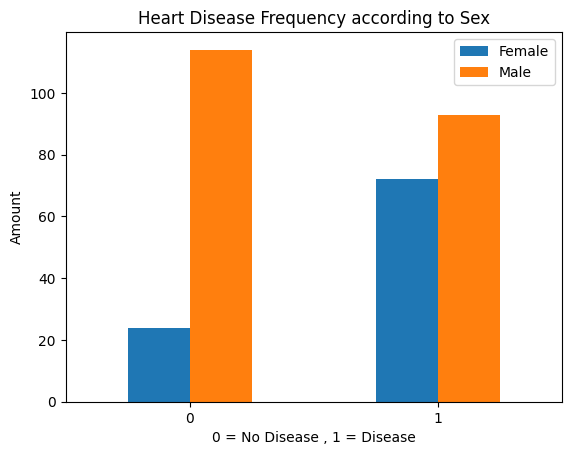

In [12]:
#Compare target column with sex column
pd.crosstab(hea.target,hea.sex).plot(kind='bar')
plt.title('Heart Disease Frequency according to Sex')
plt.xlabel('0 = No Disease , 1 = Disease')
plt.ylabel('Amount')
plt.legend(['Female','Male'])
plt.xticks(rotation=0)
plt.show()

### Age vs Max Heart Rate for Heart Disease

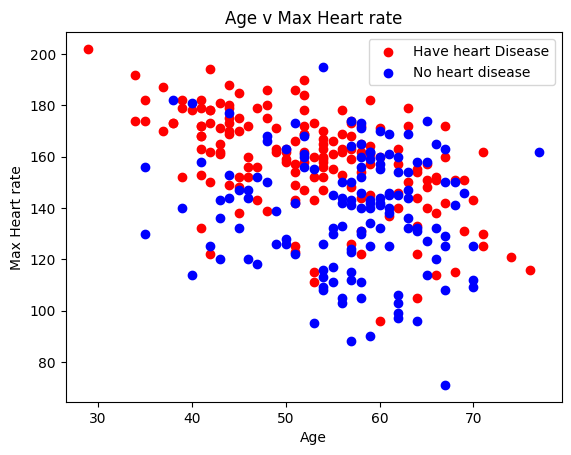

In [13]:
#Create another figure
plt.scatter(hea.age[hea.target==1],
            hea.thalach[hea.target==1],color='red')
plt.scatter(hea.age[hea.target==0],
            hea.thalach[hea.target==0],color='blue')
plt.xlabel('Age')
plt.ylabel('Max Heart rate')
plt.title('Age v Max Heart rate')
plt.legend(['Have heart Disease','No heart disease'])

<Axes: ylabel='Frequency'>

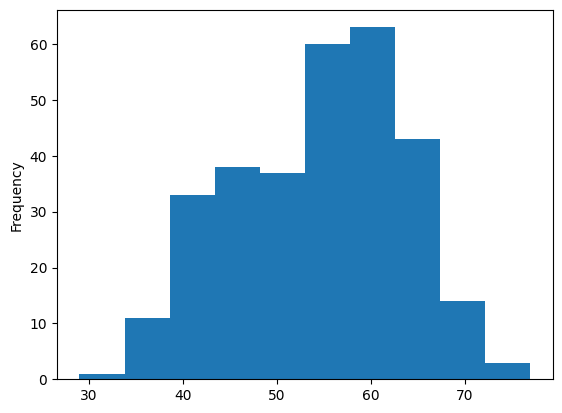

In [14]:
# Check the distribution of the age column with a histogram
hea.age.plot.hist()

### Heart Disease Frequency per Chest pain type

In [15]:
pd.crosstab(hea.cp,hea.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


<Axes: xlabel='cp'>

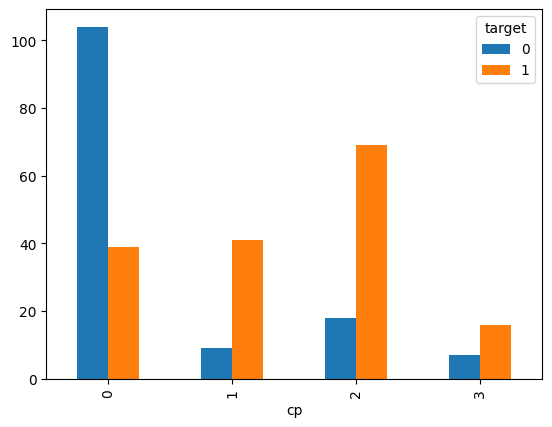

In [16]:
# Make it visualise
pd.crosstab(hea.cp,hea.target).plot(kind='bar')

In [17]:
# make a coorelational matrix
hea.corr()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [18]:
#lets make our correlational matrrix a little prettier

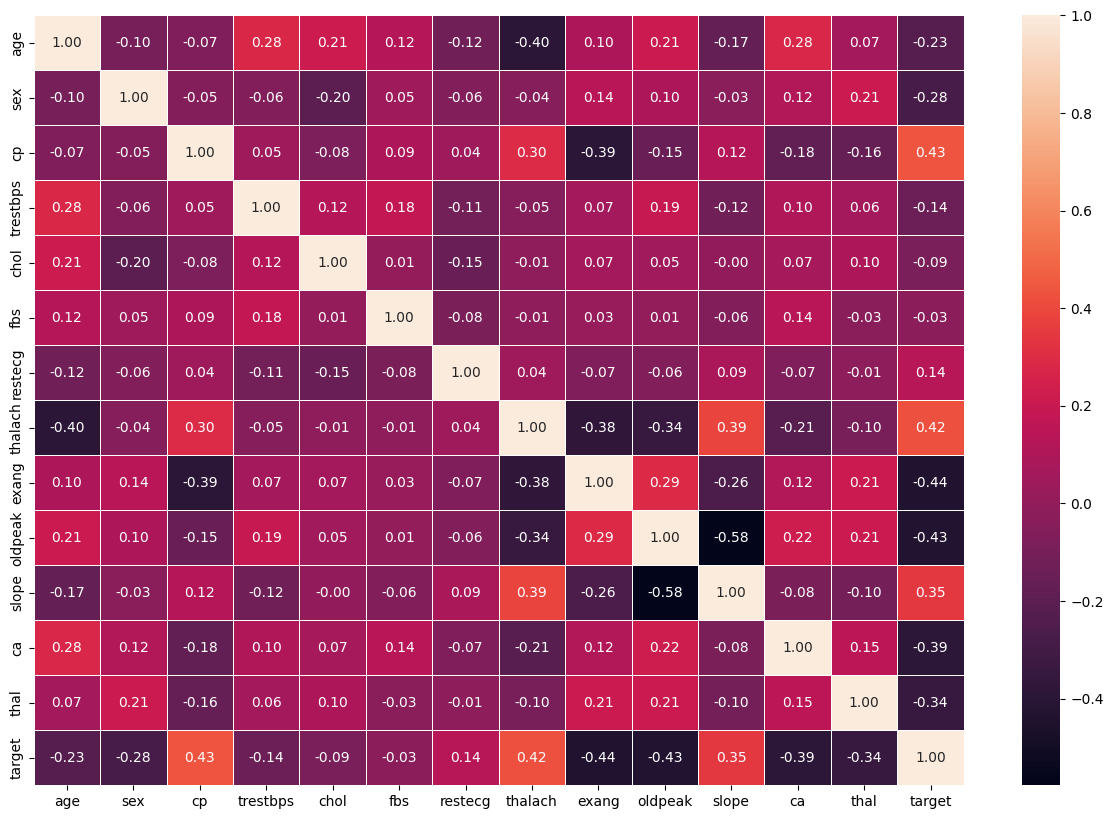

In [19]:
corr_matrix=hea.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,annot=True,
              linewidths=0.5,
              fmt=".2f")


## Modelling

In [20]:
hea.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [21]:
# Spliting the data
x=hea.drop('target' ,axis=1)
y=hea['target']

In [22]:

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [23]:
x_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
103,42,1,2,120,240,1,1,194,0,0.8,0,0,3
263,63,0,0,108,269,0,1,169,1,1.8,1,2,2
294,44,1,0,120,169,0,1,144,1,2.8,0,0,1
126,47,1,0,112,204,0,1,143,0,0.1,2,0,2
161,55,0,1,132,342,0,1,166,0,1.2,2,0,2


In [24]:
models={'Logistic Regression':LogisticRegression(),
       'KNN':KNeighborsClassifier(),
       'Random Forest': RandomForestClassifier()}
# Create a function to fit and score models
def fit_score_(models,x_train,y_train,x_test,y_test):
    #set random seeds
    np.random.seed(42)
    model_score={}
    for name,model in models.items():
        #fit the model to the data
        model.fit(x_train,y_train)
        model_score[name]=model.score(x_test,y_test)
    return model_score
x=fit_score_(models,x_train,y_train,x_test,y_test)
x

C:\Users\Atharva\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8032786885245902,
 'KNN': 0.5901639344262295,
 'Random Forest': 0.8032786885245902}

## Model Comparison

<Axes: >

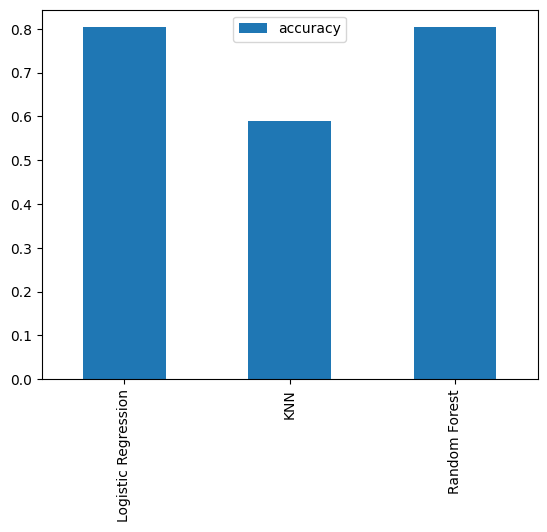

In [25]:
model_compare=pd.DataFrame(x,index=['accuracy'])
model_compare.T.plot(kind='bar')

* Hyperparameter tuning

In [26]:
# lets tune KNN
train_scores=[]
test_scores=[]

#create a list of different values for N_neighbors
neighbors=range(1,21)
knn=KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors=i)

    #fit 
    knn.fit(x_train,y_train)
    test_scores.append(knn.score(x_test,y_test))
    train_scores.append(knn.score(x_train,y_train))
    

In [27]:
max(test_scores)

0.639344262295082

In [28]:
train_scores

[1.0,
 0.8140495867768595,
 0.7851239669421488,
 0.7603305785123967,
 0.7768595041322314,
 0.743801652892562,
 0.743801652892562,
 0.731404958677686,
 0.743801652892562,
 0.7479338842975206,
 0.7396694214876033,
 0.7231404958677686,
 0.7231404958677686,
 0.7355371900826446,
 0.7396694214876033,
 0.7272727272727273,
 0.6983471074380165,
 0.7066115702479339,
 0.71900826446281,
 0.7066115702479339]

## Hyperparameter tuning

In [29]:
# with RandomizedSearchCV
log_reg_grid={"C":np.logspace(-4,4,20),
             "solver":["liblinear"]}
#Create a hyperparameter grid for RandomForestClassifier
rf_grid={"n_estimators":np.arange(10,1000,50),
        "max_depth":[None ,3,5,10],
        "min_samples_split":np.arange(2,20,2),
         "min_samples_leaf":np.arange(1,20,2)}

RandomSearchcv

In [30]:
#Logistic regerrion

np.random.seed(42)

#Setup random hyperparameter search for logisticRegression
rs_log_reg=RandomizedSearchCV(LogisticRegression(),param_distributions=log_reg_grid,
                             cv=5,
                             n_iter=20,verbose=True)

#fit
rs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [31]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [32]:
rs_log_reg.score(x_test,y_test)

0.819672131147541

In [33]:
rf=RandomizedSearchCV(RandomForestClassifier(),param_distributions=rf_grid,cv=5,n_iter=20,verbose=True)
rf.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [34]:
rf.best_params_

{'n_estimators': 60,
 'min_samples_split': 2,
 'min_samples_leaf': 3,
 'max_depth': 3}

In [35]:
rf.score(x_test,y_test)

0.7704918032786885

In [36]:
y_preds=rf.predict(x_test)

In [37]:
y_preds

array([1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1], dtype=int64)

In [38]:
c=confusion_matrix(y_test,y_preds)
c

array([[21,  8],
       [ 6, 26]], dtype=int64)

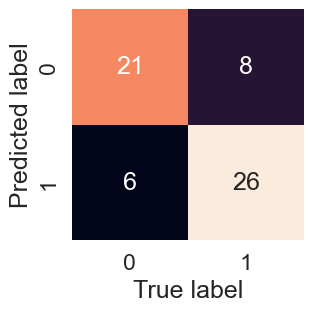

In [ ]:
sns.set(font_scale=1.5)
def plot_conf_mat(y_test,y_preds):
    fig,ax=plt.subplots(figsize=(3,3))
    ax=sns.heatmap(confusion_matrix(y_test,y_preds),
                  annot=True,
                  cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
plot_conf_mat(y_test,y_preds)

In [42]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.78      0.72      0.75        29
           1       0.76      0.81      0.79        32

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61

